In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The frequency analysis showed that layer 5 of S1 displays largest change in frequency power. What exactly is happening there?

# Average Membrane Potential

In [2]:
samples = pd.read_csv('../sample_sheet.csv')
samples = samples[samples['Region'] == 'S1_L5']
samples

,SID,AnimalID,CellName,Region,Date,Depth,Count,Location
10,W3_C12,W3,C12,S1_L5,2019 12 18,768.150047,780,W3/C12
11,W3_C13,W3,C13,S1_L5,2019 12 18,684.441388,695,W3/C13
12,W3_C14,W3,C14,S1_L5,2019 12 18,620.428884,630,W3/C14
13,W3_C15,W3,C15,S1_L5,2019 12 18,886.326978,900,W3/C15
14,W3_C16,W3,C16,S1_L5,2019 12 18,792.770241,805,W3/C16
15,W4_C11,W4,C11,S1_L5,2019 12 18,846.934668,860,W4/C11
16,W4_C12,W4,C12,S1_L5,2019 12 18,600.732729,610,W4/C12
17,W4_C13,W4,C13,S1_L5,2019 12 18,689.365427,700,W4/C13
18,W4_C14,W4,C14,S1_L5,2019 12 18,866.630823,880,W4/C14
19,W4_C15,W4,C15,S1_L5,2019 12 18,684.441388,695,W4/C15


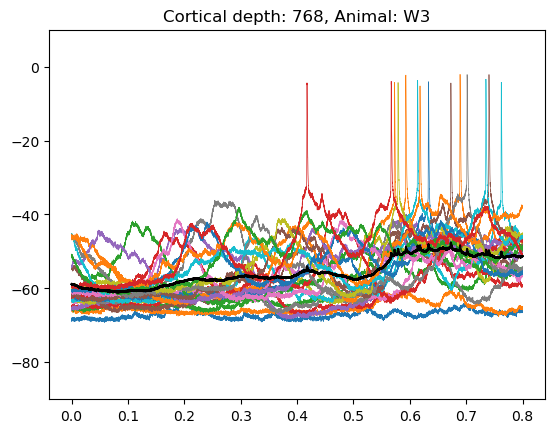

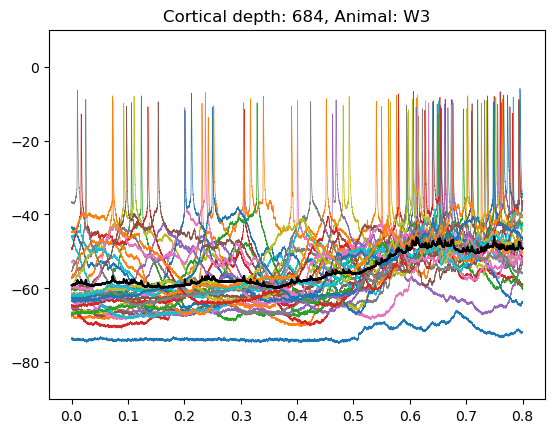

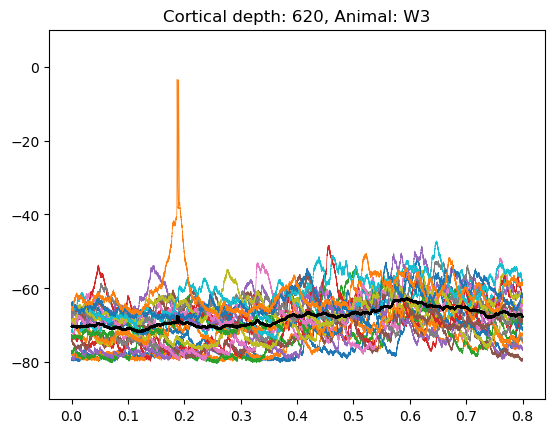

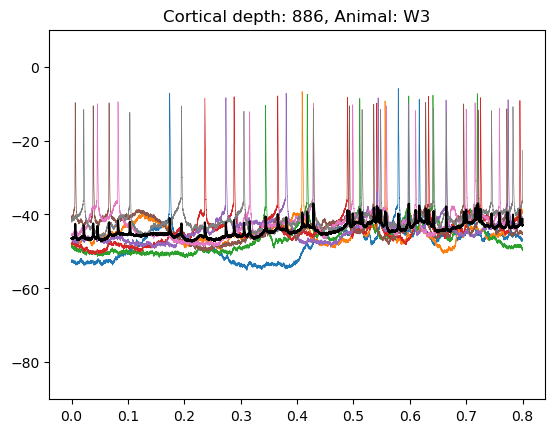

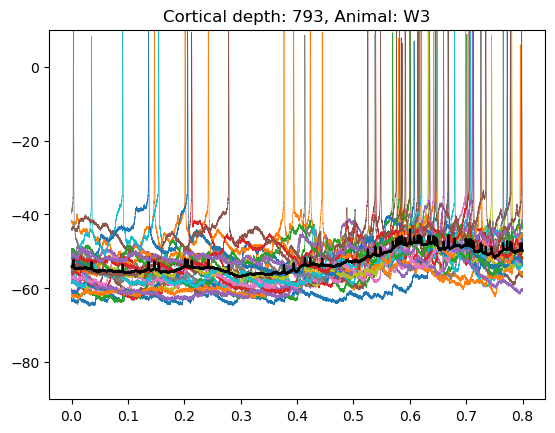

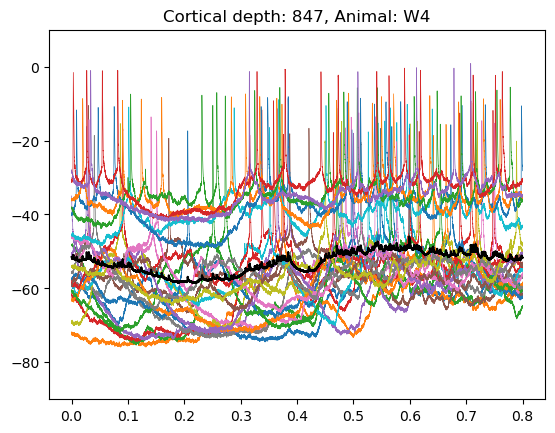

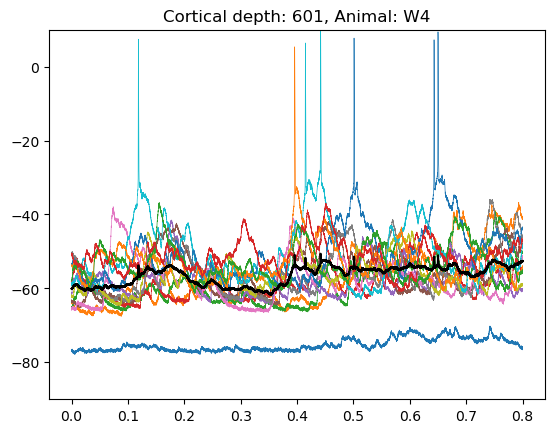

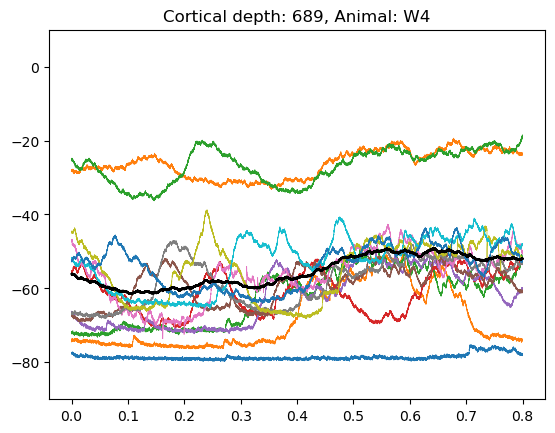

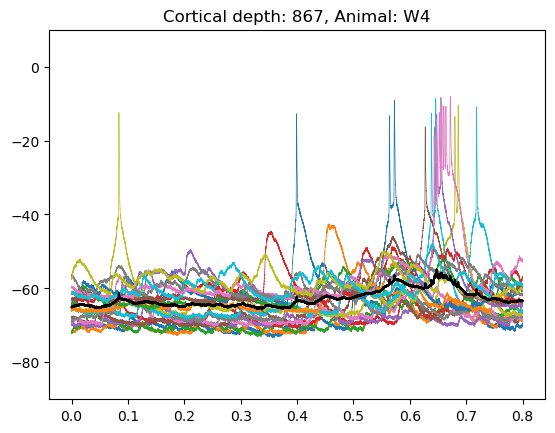

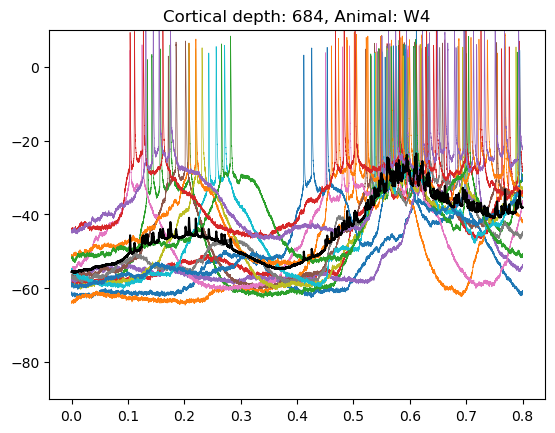

In [3]:
sample_vm_l5 = []
time = []

for index, sample in samples.iterrows():
    movement_events = pd.read_csv(f'../output/spontaneous-movement/{sample["AnimalID"]}/{sample["CellName"]}/movement_final.csv')
    data = pd.read_pickle(f'../output/spontaneous-movement/{sample["AnimalID"]}/{sample["CellName"]}/vm/raw.pkl')

    event_y = []
    event_x = []

    for index, event in movement_events.iterrows():
        event_data = data.copy().pick(picks = event['ChannelID']).crop(tmin = event['Start'] - 0.4,
                                                                       tmax = event['Start'] + 0.4)

        x = event_data.times
        y = event_data.get_data()[0, :]

        event_y.append(y)
        event_x = x

        plt.plot(x, y, linewidth = 0.5)

    event_mean = np.mean(event_y, axis = 0)
    sample_vm_l5.append(event_mean)
    time = event_x
    plt.plot(event_x, event_mean, c = 'black')
    plt.ylim(-90, 10)
    plt.title(f'Cortical depth: {round(sample["Depth"])}, Animal: {sample["AnimalID"]}')
    plt.show()

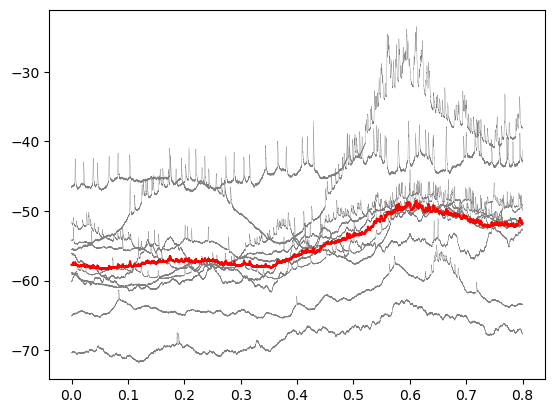

In [4]:
for sample in sample_vm_l5:
    plt.plot(time, sample, linewidth = 0.25, color = 'gray')

plt.plot(time, np.mean(sample_vm_l5, axis = 0), color = 'red')
plt.show()

In [5]:
samples = pd.read_csv('../sample_sheet.csv')
samples = samples[samples['Region'] == 'S1_L23']
samples

,SID,AnimalID,CellName,Region,Date,Depth,Count,Location
0,W1_C1,W1,C1,S1_L23,2019 12 09,177.265396,180,W1/C1
1,W1_C2,W1,C2,S1_L23,2019 12 09,265.898093,270,W1/C2
2,W1_C8,W1,C8,S1_L23,2019 12 10,315.138481,320,W1/C8
3,W2_C3,W2,C3,S1_L23,2019 12 12,236.353861,240,W2/C3
4,W2_C4,W2,C4,S1_L23,2019 12 12,285.594248,290,W2/C4
5,W2_C5,W2,C5,S1_L23,2019 12 12,408.695218,415,W2/C5
6,W2_C6,W2,C6,S1_L23,2019 12 12,196.961551,200,W2/C6
7,W3_C10,W3,C10,S1_L23,2019 12 18,364.378869,370,W3/C10
8,W3_C11,W3,C11,S1_L23,2019 12 18,226.505783,230,W3/C11
9,W4_C10,W4,C10,S1_L23,2019 12 18,206.809628,210,W4/C10


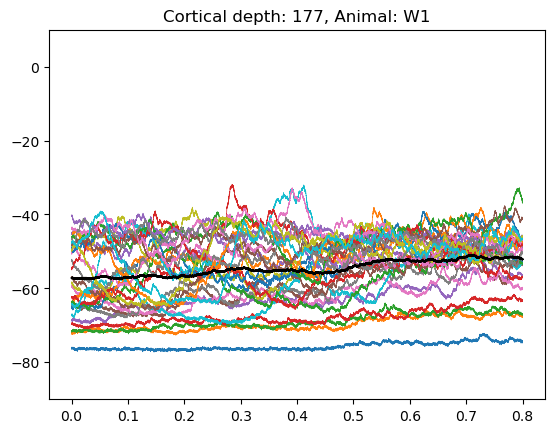

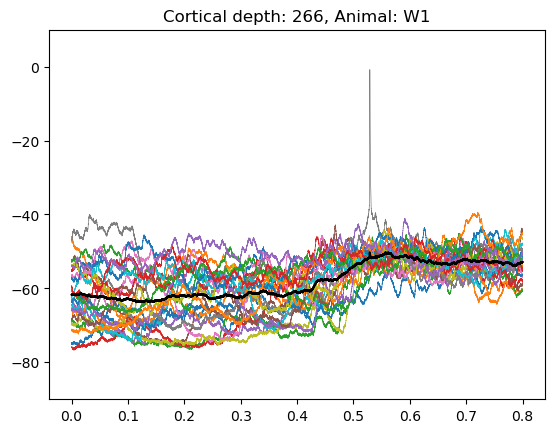

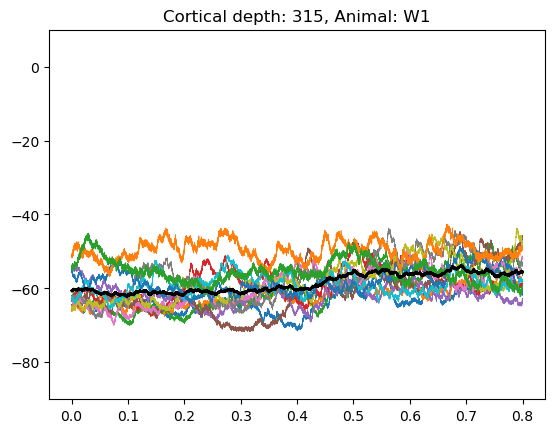

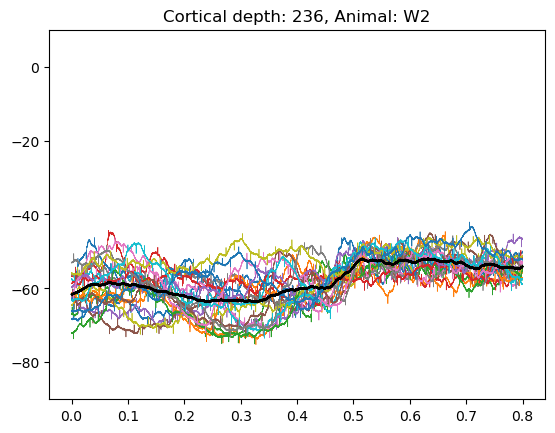

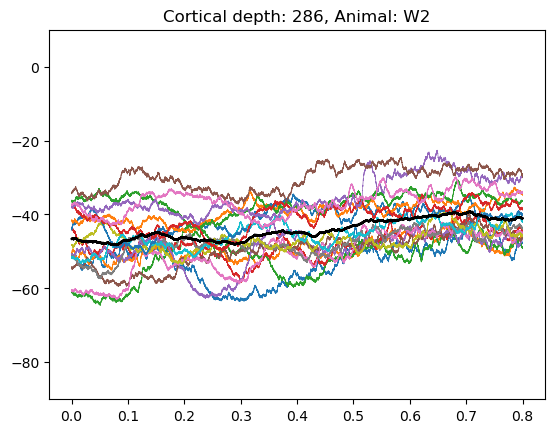

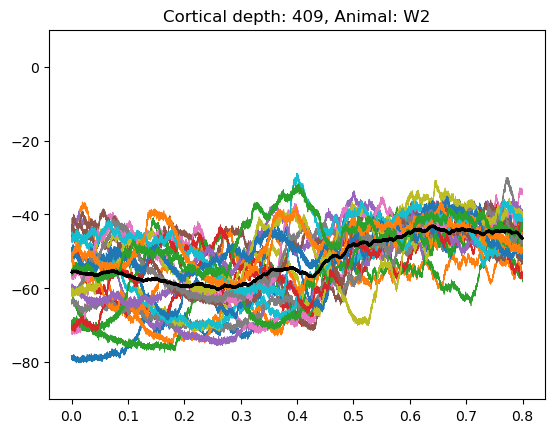

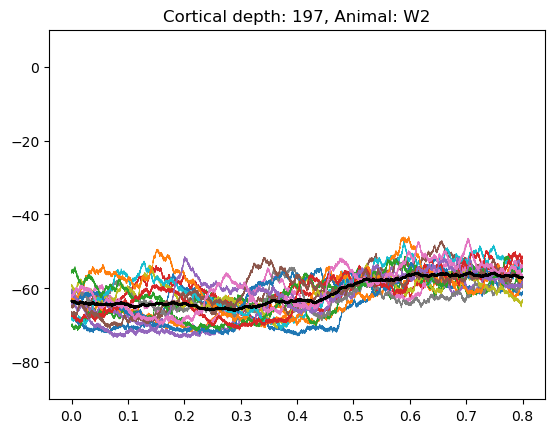

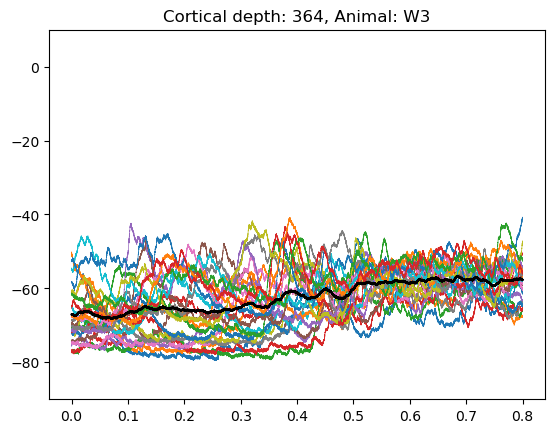

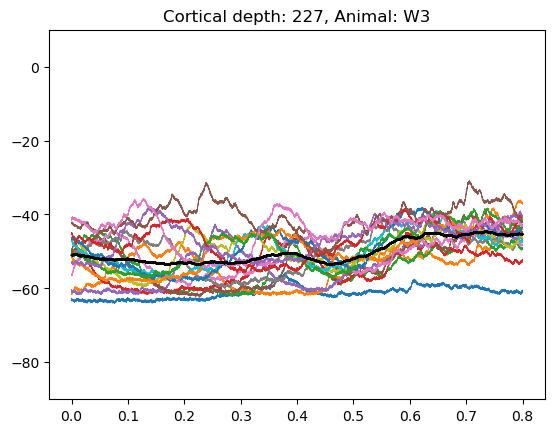

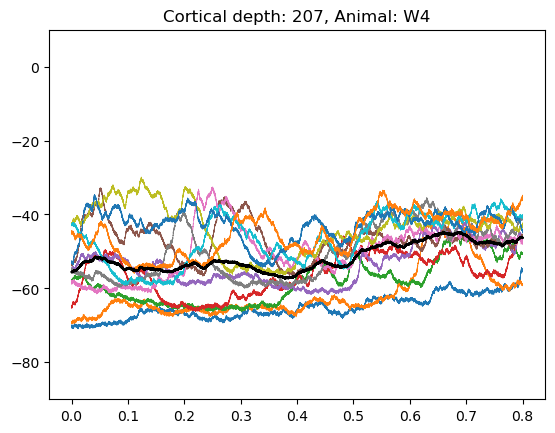

In [6]:
sample_vm = []
time = []

for index, sample in samples.iterrows():
    movement_events = pd.read_csv(f'../output/spontaneous-movement/{sample["AnimalID"]}/{sample["CellName"]}/movement_final.csv')
    data = pd.read_pickle(f'../output/spontaneous-movement/{sample["AnimalID"]}/{sample["CellName"]}/vm/raw.pkl')

    event_y = []
    event_x = []

    for index, event in movement_events.iterrows():
        event_data = data.copy().pick(picks = event['ChannelID']).crop(tmin = event['Start'] - 0.4,
                                                                       tmax = event['Start'] + 0.4)

        x = event_data.times
        y = event_data.get_data()[0, :]

        event_y.append(y)
        event_x = x

        plt.plot(x, y, linewidth = 0.5)

    event_mean = np.mean(event_y, axis = 0)
    time = event_x
    sample_vm.append(event_mean)
    plt.plot(event_x, event_mean, c = 'black')
    plt.ylim(-90, 10)
    plt.title(f'Cortical depth: {round(sample["Depth"])}, Animal: {sample["AnimalID"]}')
    plt.show()

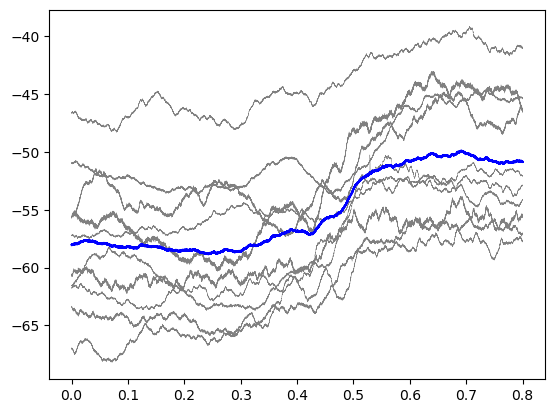

In [7]:
for sample in sample_vm:
    plt.plot(time, sample, linewidth = 0.25, color = 'gray')

plt.plot(time, np.mean(sample_vm, axis = 0), color = 'blue')
plt.show()

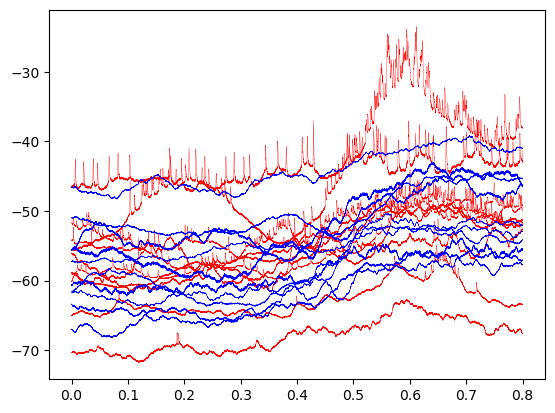

In [8]:
for sample in sample_vm_l5:
    plt.plot(time, sample, linewidth = 0.25, color = 'red')

for sample in sample_vm:
    plt.plot(time, sample, linewidth = 0.25, color = 'blue')
    
plt.show()

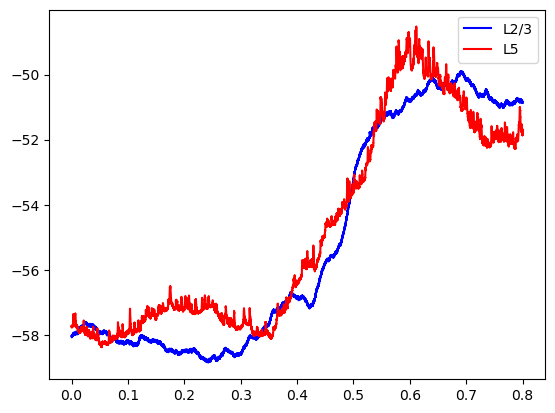

In [9]:
plt.plot(time, np.mean(sample_vm, axis = 0), color = 'blue', label = 'L2/3')
plt.plot(time, np.mean(sample_vm_l5, axis = 0), color = 'red', label = 'L5')
plt.legend()
plt.show()

# Action Potential Firing Frequency in L5

In [10]:
samples = pd.read_csv('../sample_sheet.csv')
samples = samples[samples['Region'] == 'S1_L5']
sample = samples.iloc[0]

movement_events = pd.read_csv(f'../output/spontaneous-movement/{sample["AnimalID"]}/{sample["CellName"]}/movement_final.csv')
data = pd.read_pickle(f'../output/spontaneous-movement/{sample["AnimalID"]}/{sample["CellName"]}/vm/raw.pkl')

In [11]:
def find_over_threshold(signal, ap_threshold = -10):
    over_threshold = np.where(signal > ap_threshold)[0]

    if len(over_threshold) == 0:
        return []

    idx_diff = np.where(np.diff(over_threshold) != 1)[0]
    ap_count = np.append(over_threshold[0], over_threshold[idx_diff + 1])

    return ap_count

In [12]:
def find_ap(signal, time, ap_threshold = -20):
    differential = np.diff(signal)
    aps = find_over_threshold(signal, ap_threshold = ap_threshold)

    if len(aps) == 0:
        return pd.DataFrame()

    action_potentials = []

    for ap_index in aps:
        diff_over_threshold = np.where(differential[(ap_index - 50):(ap_index + 50)] > 1)[0]

        if len(diff_over_threshold) == 0:
            print(f'Skipping AP on {time[ap_index]} with voltage {signal[ap_index]}')
            continue

        exact_onset = diff_over_threshold[0] + ap_index - 50

        action_potentials.append(pd.DataFrame({
            'Onset': [exact_onset],
            'Time': [time[exact_onset]],
            'Voltage': [signal[exact_onset]]
        }))

    action_potentials = pd.concat(action_potentials)
    action_potentials = action_potentials.reset_index(drop = True)

    return action_potentials

In [13]:
def calculate_ap_frequency(time, ap_list, time_step = 0.1, sf = 20_000):
    if len(ap_list) == 0:
        return np.repeat(0, repeats = sf * np.max(time) + 1)
    
    time_range = np.arange(0, np.max(time), time_step)

    ap_freq = []
    for start in time_range:
        end = start + time_step
        ap_count = np.sum(np.logical_and(ap_list['Time'] > start, ap_list['Time'] <= end))
    
        ap_freq.append(pd.DataFrame({
            'Start': [start],
            'End': [end],
            'Frequency': [ap_count / time_step]
        }))
    
    ap_freq = pd.concat(ap_freq)
    ap_freq = ap_freq.reset_index(drop = True)
    freq_graph = np.append(ap_freq['Frequency'][0], np.repeat(ap_freq['Frequency'], repeats = sf * time_step))
    
    return freq_graph

In [14]:
event = movement_events.iloc[15]
event_data = data.copy().pick(picks = event['ChannelID']).crop(tmin = event['Start'] - 0.4, tmax = event['Start'] + 0.4)

x = event_data.times
y = event_data.get_data()[0, :]

event_aps = find_ap(y, x, ap_threshold = -15)
freq_graph = calculate_ap_frequency(time = x, ap_list = event_aps, time_step = 0.1)

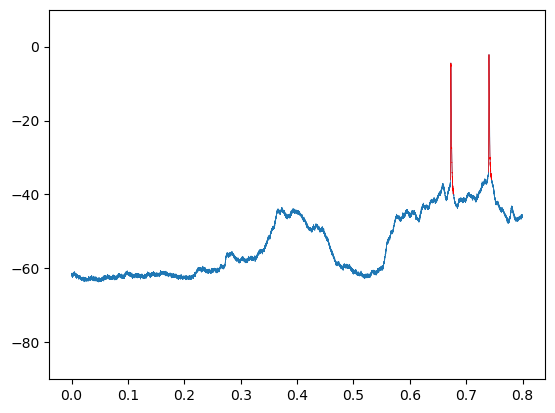

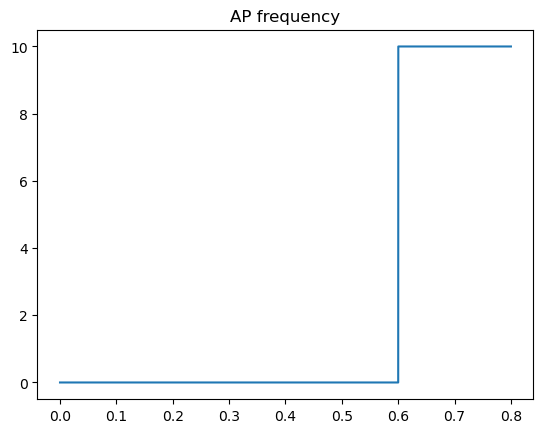

In [15]:
plt.plot(x, y, linewidth = 0.5)

for i, ap in event_aps.iterrows():
    onset = int(ap['Onset'])
    expand_by = 100
    plt.plot(x[onset:(onset + expand_by)], y[onset:(onset + expand_by)], linewidth = 0.5, c = 'red')

plt.ylim(-90, 10)
plt.show()

plt.plot(x, freq_graph)
plt.title('AP frequency')
plt.show()

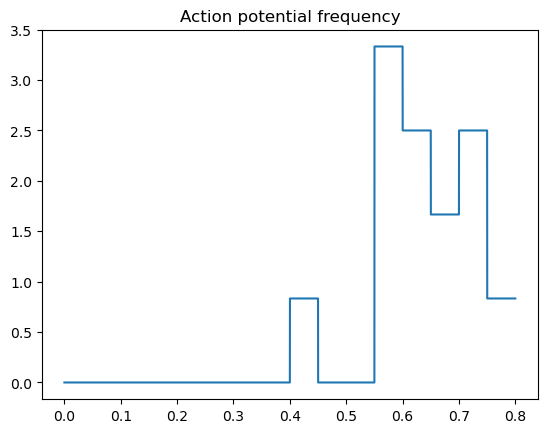

In [16]:
event_y = []
event_x = []

for index, event in movement_events.iterrows():
    event_data = data.copy().pick(picks = event['ChannelID']).crop(tmin = event['Start'] - 0.4,
                                                                   tmax = event['Start'] + 0.4)

    time = event_data.times
    signal = event_data.get_data()[0, :]

    event_aps = find_ap(signal, time)
    freq_graph = calculate_ap_frequency(time = time, ap_list = event_aps, time_step = 0.05)

    event_x = time
    event_y.append(freq_graph)

plt.plot(event_x, np.mean(event_y, axis = 0))
plt.title('Action potential frequency')
plt.show()

In [17]:
sample_ap_freq = []
sample_time = []

for index, sample in samples.iterrows():
    movement_events = pd.read_csv(f'../output/spontaneous-movement/{sample["AnimalID"]}/{sample["CellName"]}/movement_final.csv')
    data = pd.read_pickle(f'../output/spontaneous-movement/{sample["AnimalID"]}/{sample["CellName"]}/vm/raw.pkl')

    event_y = []
    event_x = []
    
    for i, event in movement_events.iterrows():
        event_data = data.copy().pick(picks = event['ChannelID']).crop(tmin = event['Start'] - 0.4,
                                                                       tmax = event['Start'] + 0.4)
    
        time = event_data.times
        signal = event_data.get_data()[0, :]
    
        event_aps = find_ap(signal, time, ap_threshold = -15)
        freq_graph = calculate_ap_frequency(time = time, ap_list = event_aps, time_step = 0.05)
    
        event_x = time
        event_y.append(freq_graph)

    event_mean = np.mean(event_y, axis = 0)
    sample_time = event_x
    sample_ap_freq.append(event_mean)

sample_ap_freq = np.array(sample_ap_freq)

In [20]:
print(sample_ap_freq.shape)
sample_ap_freq = sample_ap_freq[np.where(np.mean(sample_ap_freq, axis = 1) > 1)[0], : ] # Dropping samples with very little APs
print(sample_ap_freq.shape)

(10, 16001)
(6, 16001)


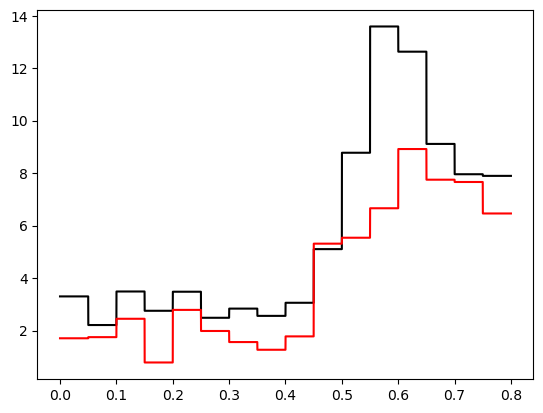

In [21]:
plt.plot(sample_time, np.mean(sample_ap_freq, axis = 0), c = 'black')
plt.plot(sample_time, np.median(sample_ap_freq, axis = 0), c = 'red')
plt.show()

# So, what is going on?

Short answer: no idea